In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skit
import seaborn as sns
from IPython.display import display, Markdown, Latex

RAW_DATA = pd.read_csv('stats.txt').reset_index(drop=True)

if True in RAW_DATA['brutOK'].unique():
    display(Markdown("### Need check data. Something wrong some methods which should have optimum return different values."))

timeB = ['tB','tBB','tDW','tDC','tH','tFPTASeps0.01','tFPTASeps0.05','tFPTASeps0.1','tFPTASeps0.2','tFPTASeps0.3',\
        'tFPTASeps0.4','tFPTASeps0.5','tFPTASeps0.6','tFPTASeps0.7','tFPTASeps0.8','tFPTASeps0.9','tFPTASeps0.95',\
        'tFPTASeps0.99']
errB = ['errH','errFPTASeps0.01','errFPTASeps0.05','errFPTASeps0.1','errFPTASeps0.2','errFPTASeps0.3',\
       'errFPTASeps0.4','errFPTASeps0.5','errFPTASeps0.6','errFPTASeps0.7','errFPTASeps0.8','errFPTASeps0.9',\
       'errFPTASeps0.95','errFPTASeps0.99']

timeMean = RAW_DATA.groupby(['n']).mean()[timeB]
timeMedian = RAW_DATA.groupby(['n']).median()[timeB]
errorMean =  RAW_DATA.groupby(['n']).mean()[errB]
errorMax = RAW_DATA.groupby(['n']).max()[errB]


### Need check data. Something wrong some methods which should have optimum return different values.

In [24]:
def do_plot(sizeX, sizeY, index, data, xLabel, yLabel, legend, file, yTicks = 30, dataDiv = 1):
    data = data / dataDiv
    fig, ax = plt.subplots(figsize=(sizeX,sizeY))
    ax.plot(index, data ,  marker='.',linewidth=0.8,  markersize=60)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_xticks(index)
    yTick = []
    last = None
    tick = data.values.reshape((data.values.size))
    tick.sort()
    minSize = tick[-1] / yTicks
    for i in tick:
        if last is None:
            yTick.append(i)
            last = i
            continue
        if i - last > minSize:
            yTick.append(i)
            last = i
    ax.set_yticks(yTick)
    ax.legend(legend, fontsize = 50)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel(xLabel, size = 35)
    plt.ylabel(yLabel, size = 35)
    plt.grid()
    fig.savefig(file, bbox_inches='tight')

In [25]:
def do_box_plot(x, y, data, xLabel, yLabel, file):
    fig, ax = plt.subplots(figsize=(30, 15))
    # setting log axis
    ax.set_yscale('log')
    ax = sns.boxplot(x='n', y='tDW', data=RAW_DATA)
    ax.set_xlabel('Cycles') 
    ax.set_ylabel('Measures')
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel(xLabel, size = 35)
    plt.ylabel(yLabel, size = 35)
    fig.savefig("test.pdf", bbox_inches='tight')

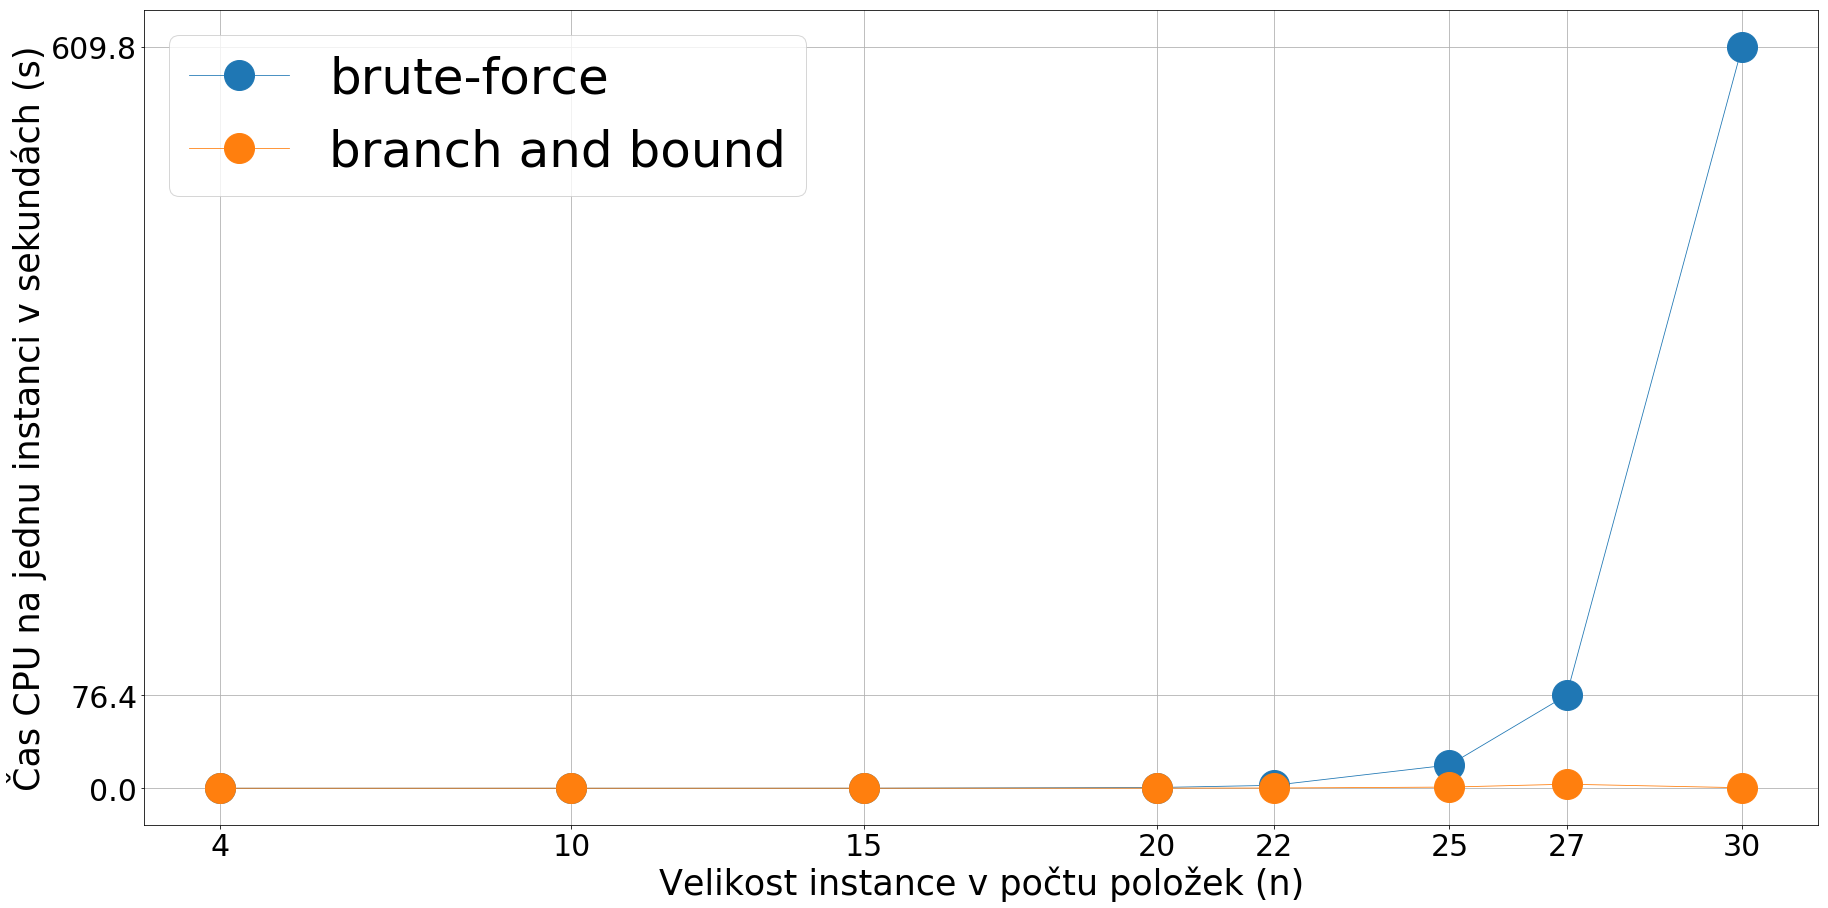

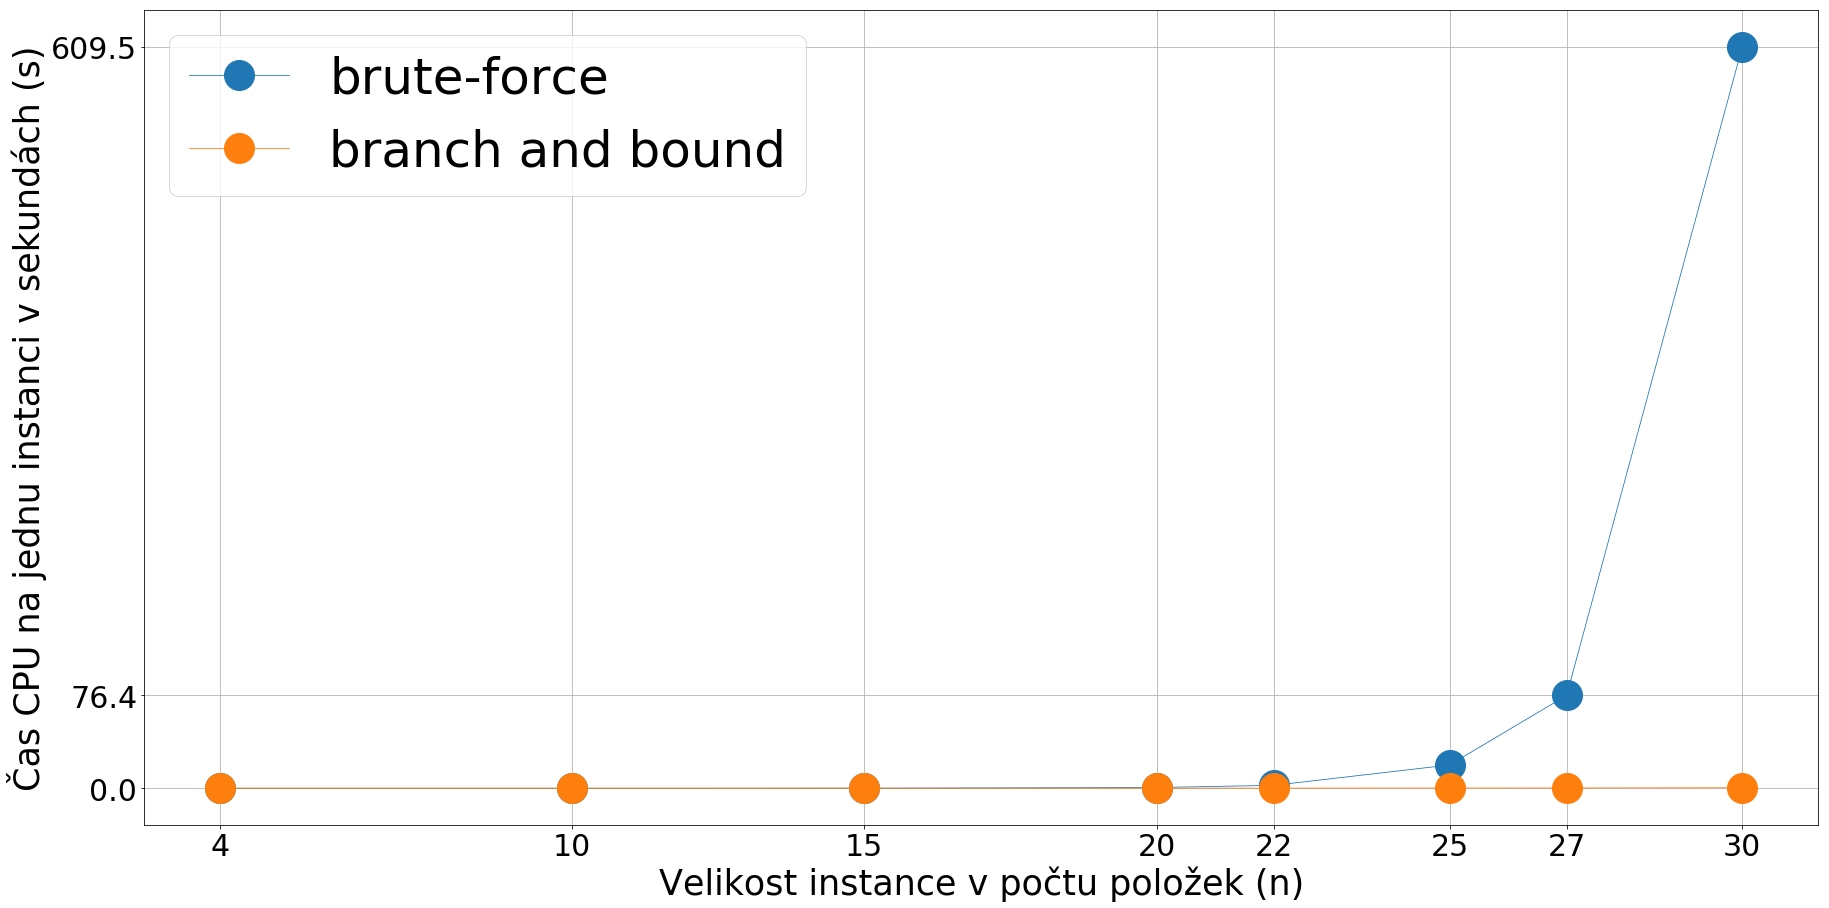

In [26]:
do_plot(30, 15, timeMean.index, timeMean[['tB', 'tDC']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v minutách (m)",
        ['brute-force', 'branch and bound'], "tBavg.pdf", 30, 6000)
do_plot(30, 15, timeMean.index, timeMedian[['tB', 'tDC']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v minutách (m)",
        ['brute-force', 'branch and bound'], "tB50.pdf", 30, 6000)

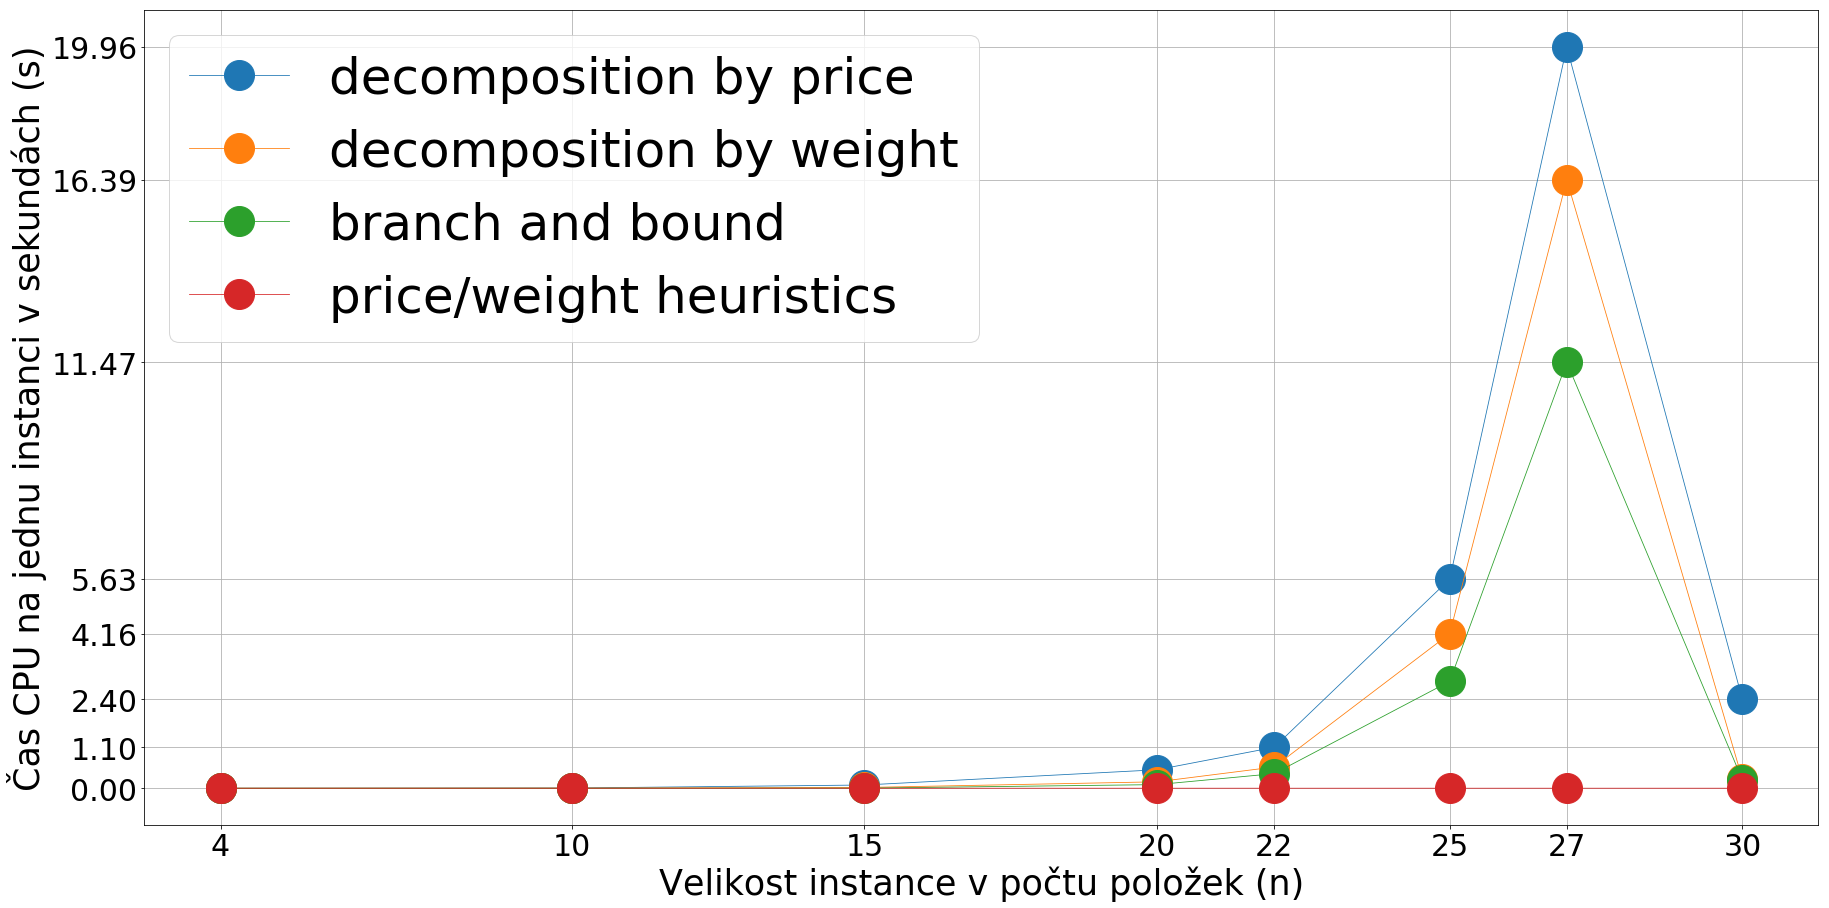

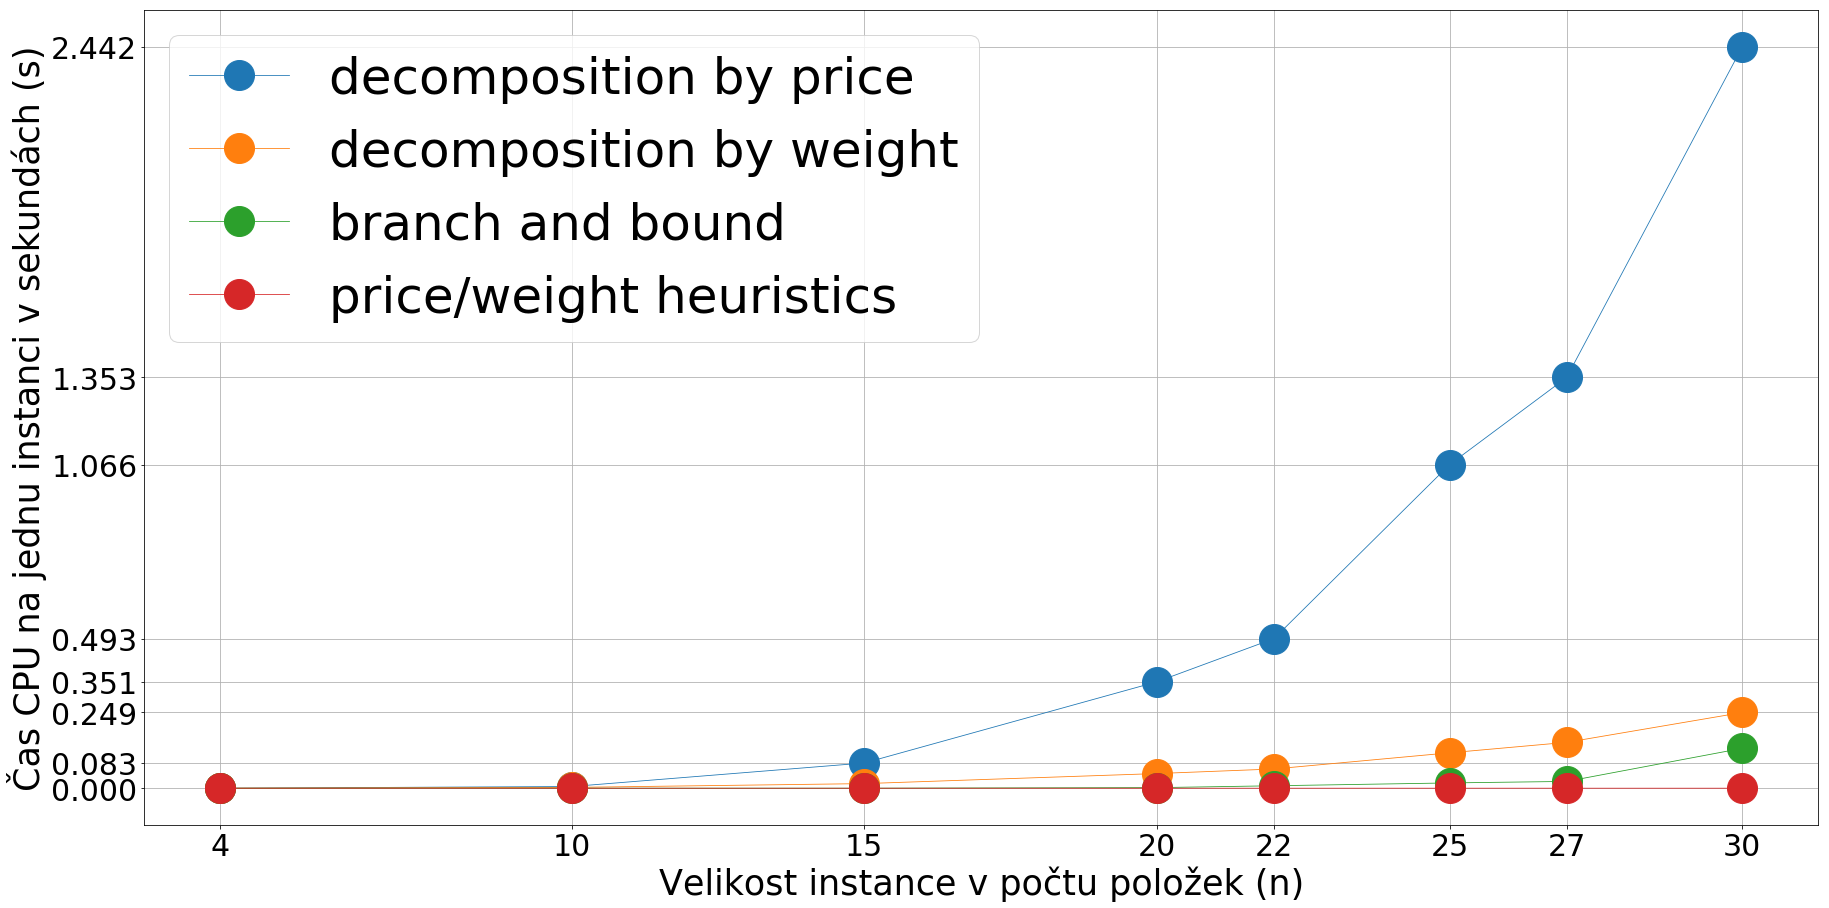

In [28]:
do_plot(30, 15, timeMean.index, timeMean[['tDC', 'tDW', 'tBB', 'tH']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)",
        ['decomposition by price', 'decomposition by weight', 'branch and bound', 'price/weight heuristics'], 
        "tDavg.pdf", 30, 1000)
do_plot(30, 15, timeMean.index, timeMedian[['tDC', 'tDW', 'tBB', 'tH']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)",
        ['decomposition by price', 'decomposition by weight', 'branch and bound', 'price/weight heuristics'], 
        "tD50.pdf", 30, 1000)

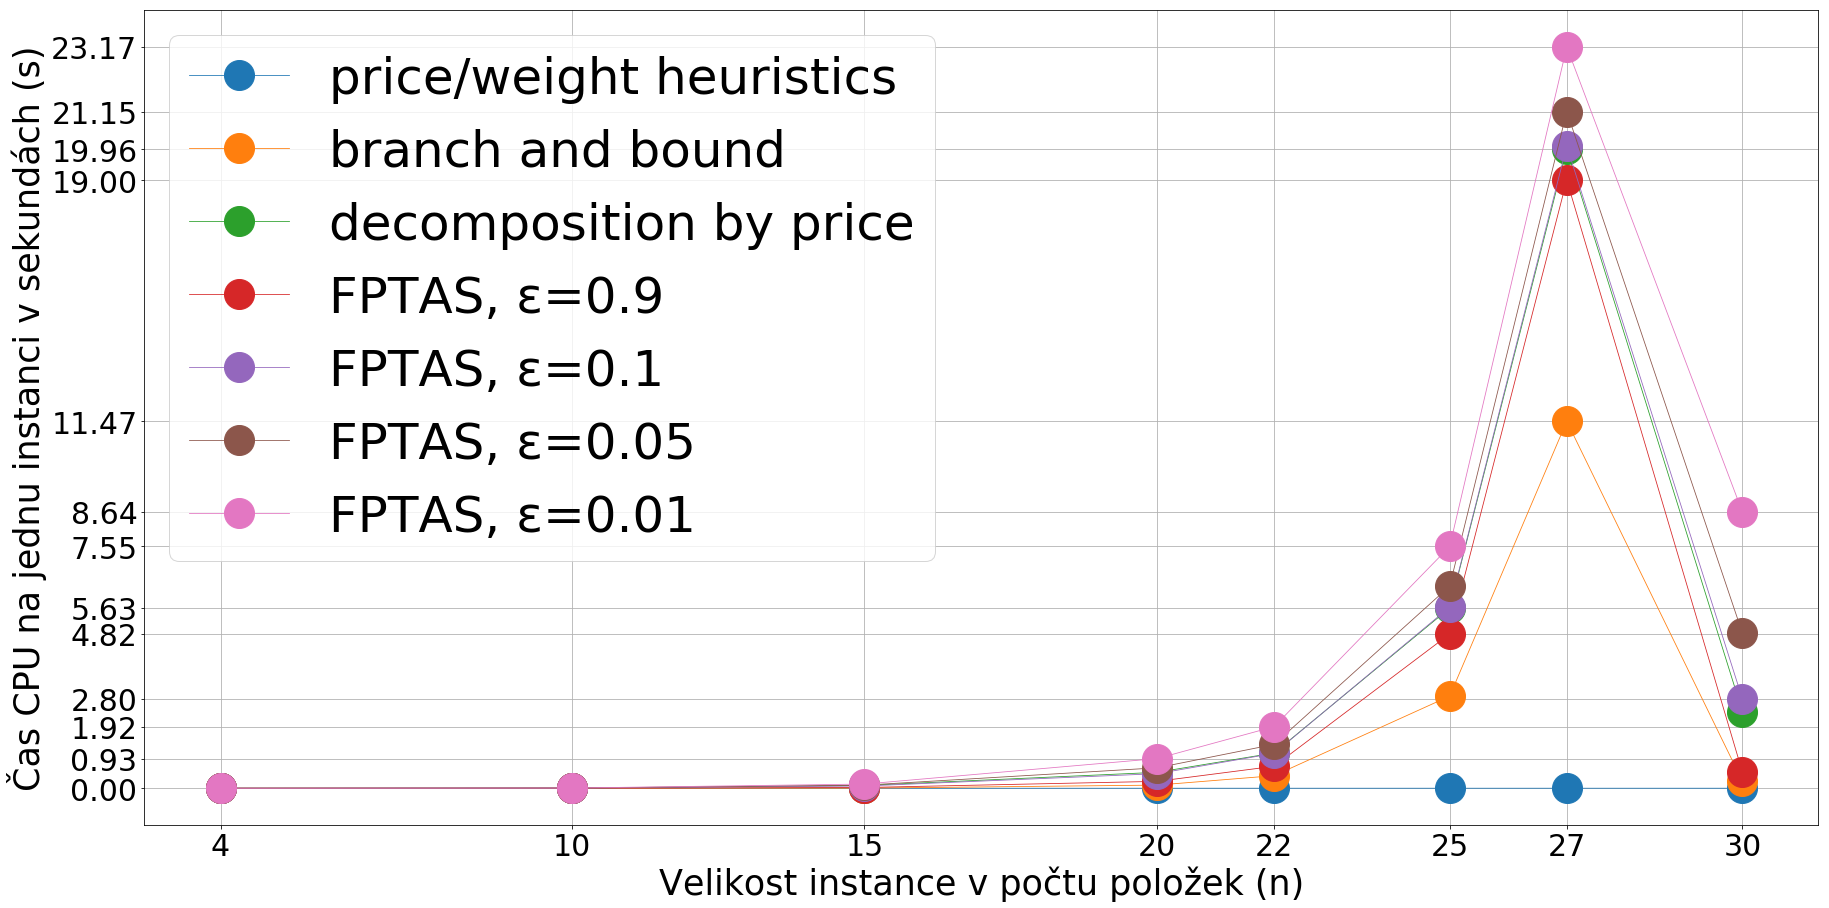

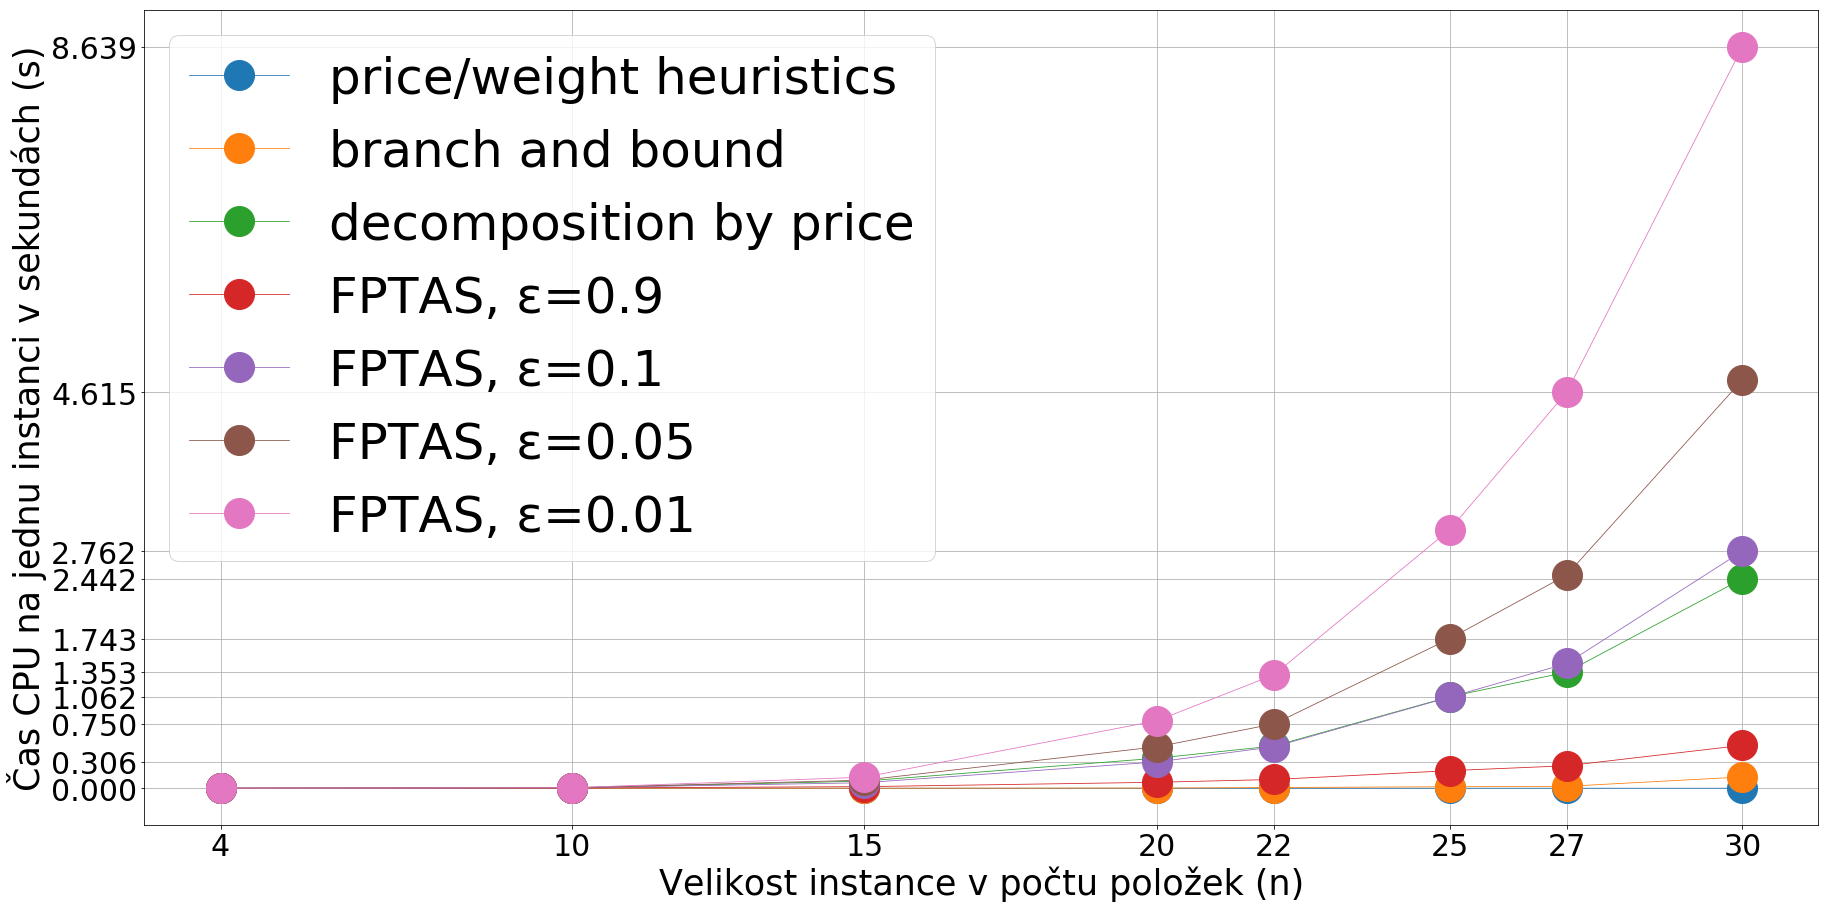

In [39]:
do_plot(30, 15, timeMean.index, timeMean[['tH','tBB','tDC', 'tFPTASeps0.9','tFPTASeps0.1','tFPTASeps0.05','tFPTASeps0.01' ]], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        ['price/weight heuristics', 'branch and bound', 'decomposition by price', 'FPTAS, ε=0.9',
        'FPTAS, ε=0.1', 'FPTAS, ε=0.05', 'FPTAS, ε=0.01'], "FPTASavg.pdf", 30, 1000)
do_plot(30, 15, timeMean.index, timeMedian[['tH','tBB','tDC', 'tFPTASeps0.9','tFPTASeps0.1','tFPTASeps0.05','tFPTASeps0.01' ]], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        ['price/weight heuristics', 'branch and bound','decomposition by price', 'FPTAS, ε=0.9',
        'FPTAS, ε=0.1', 'FPTAS, ε=0.05', 'FPTAS, ε=0.01'], "FPTASmean.pdf", 30, 1000)

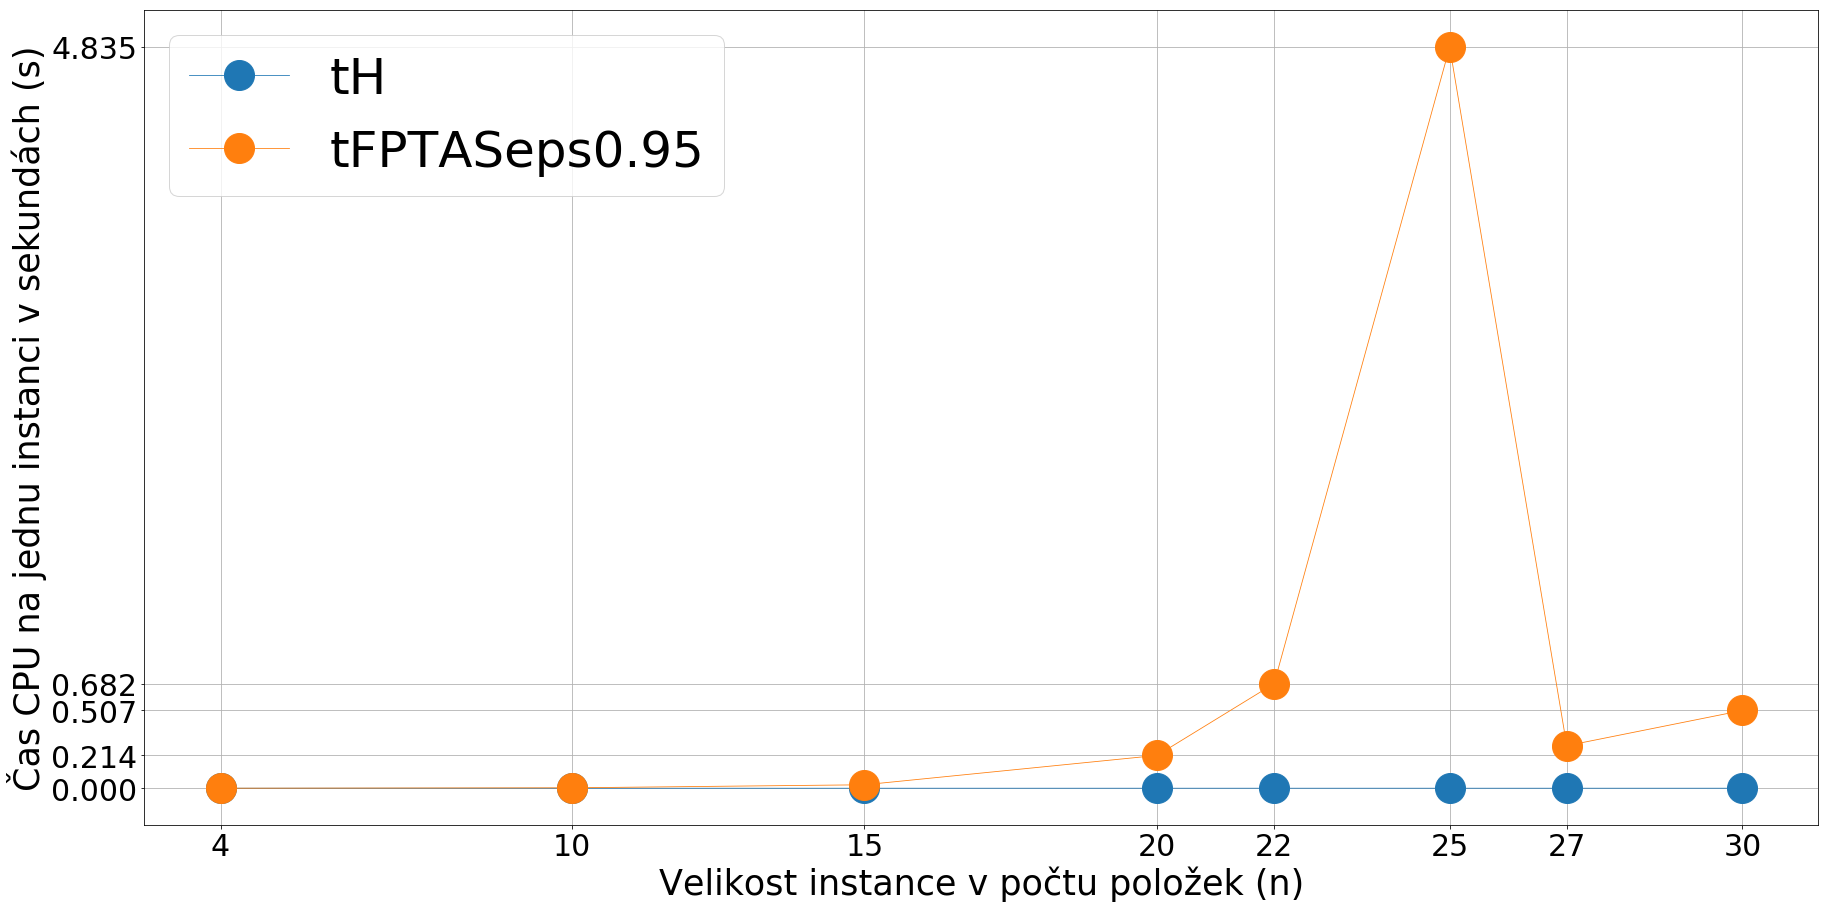

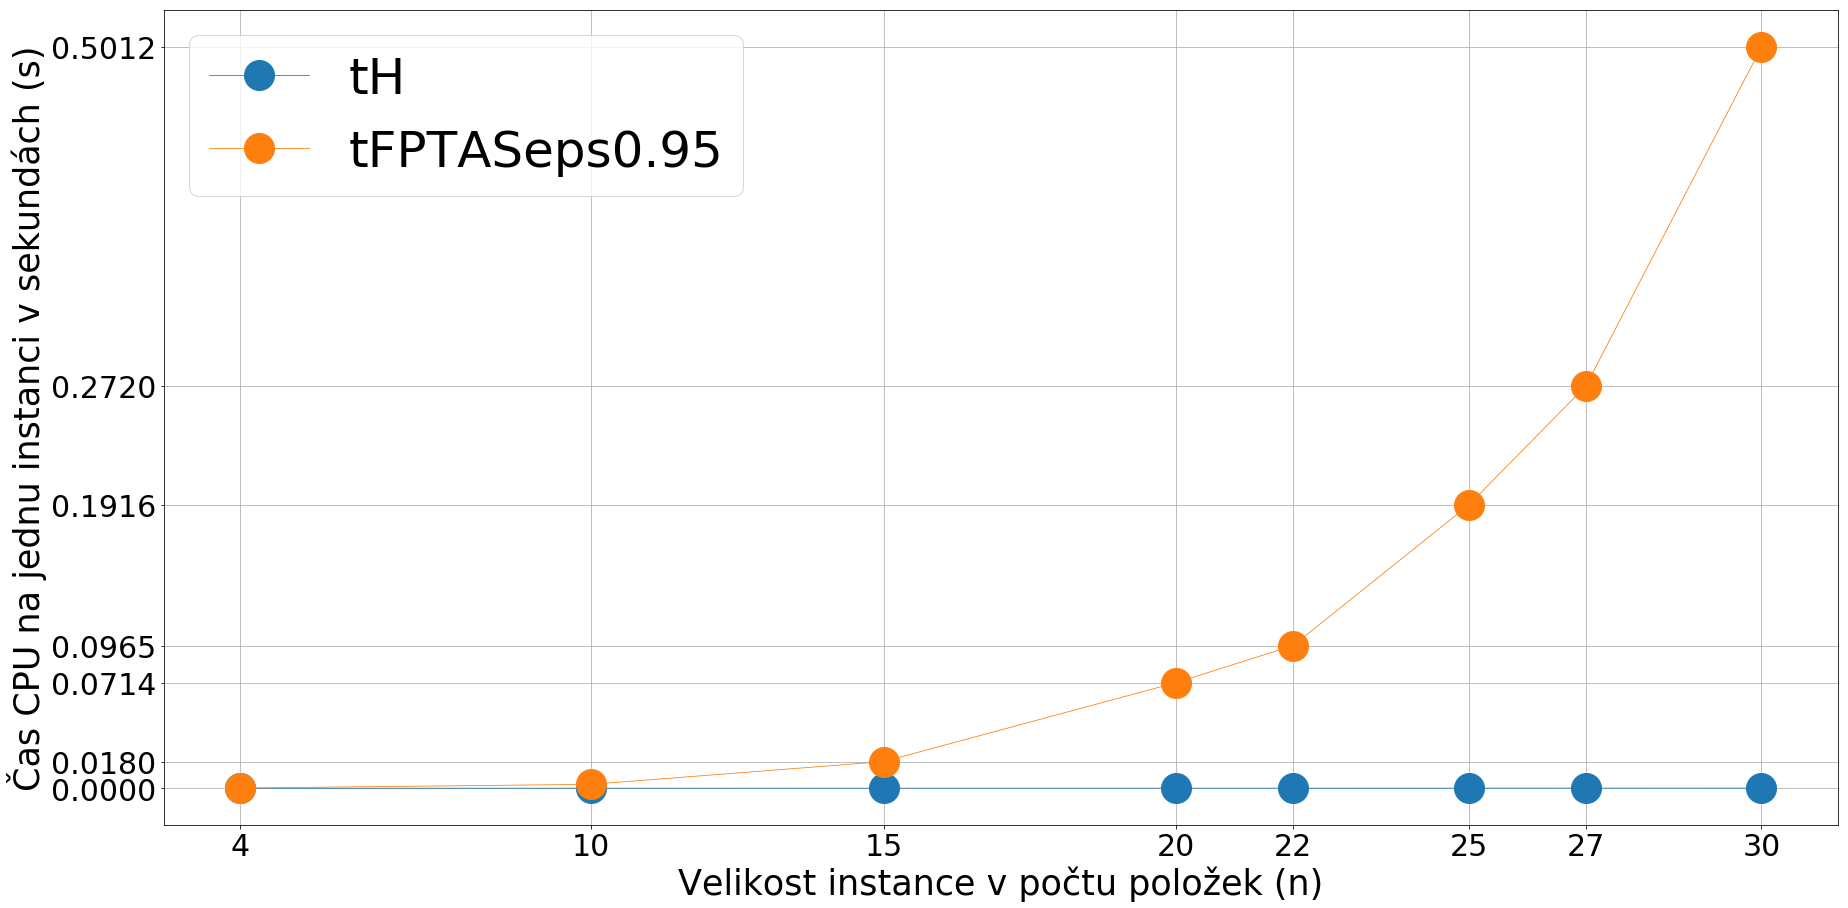

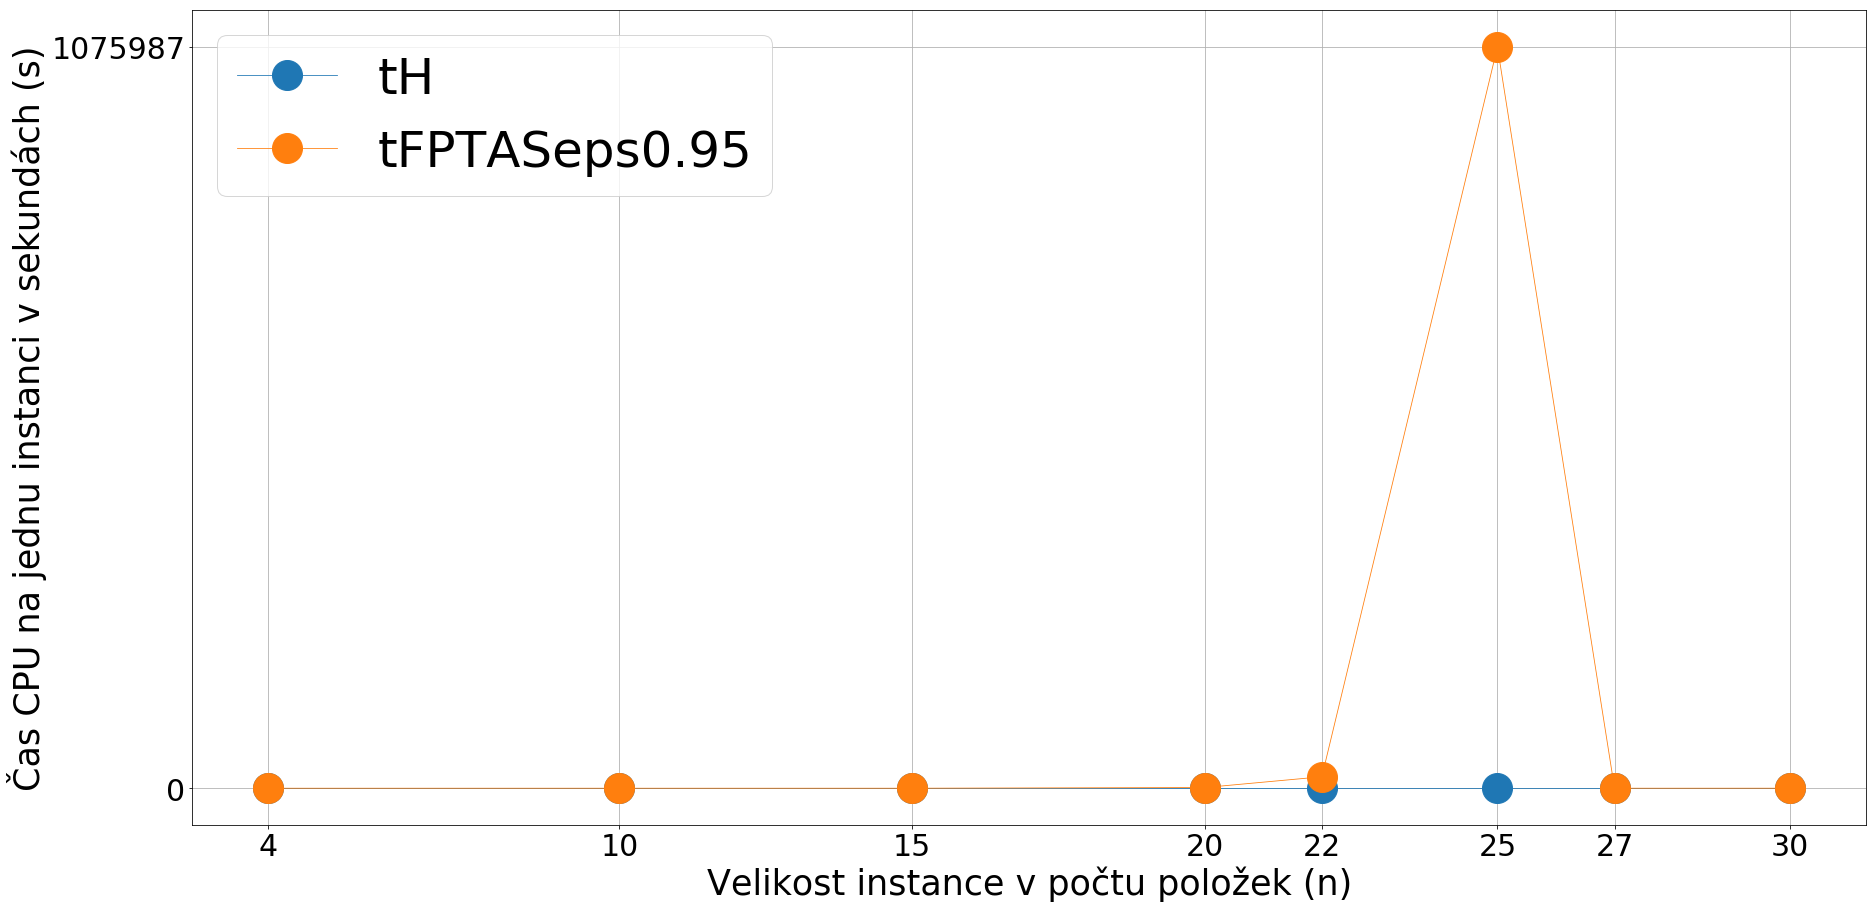

In [6]:
do_plot(30, 15, timeMean.index, timeMean[['tH','tFPTASeps0.95' ]], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        [], "test.pdf", 30, 1000)
do_plot(30, 15, timeMean.index, timeMedian[['tH','tFPTASeps0.95' ]], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        [], "test.pdf", 30, 1000)

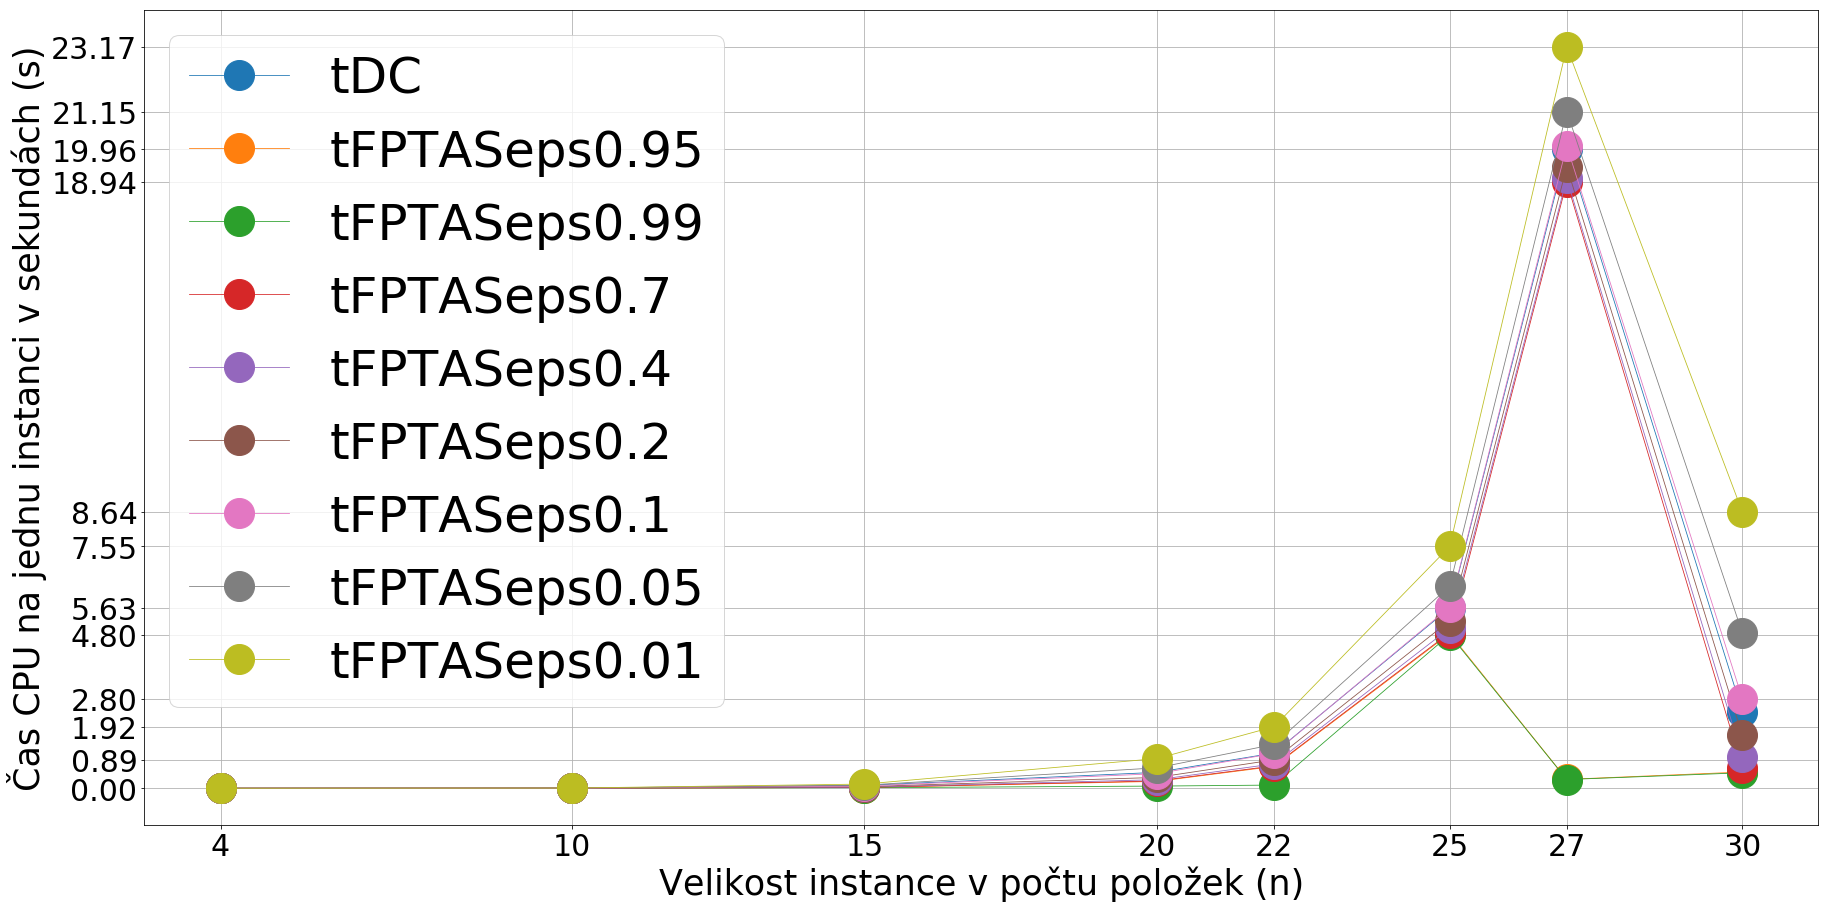

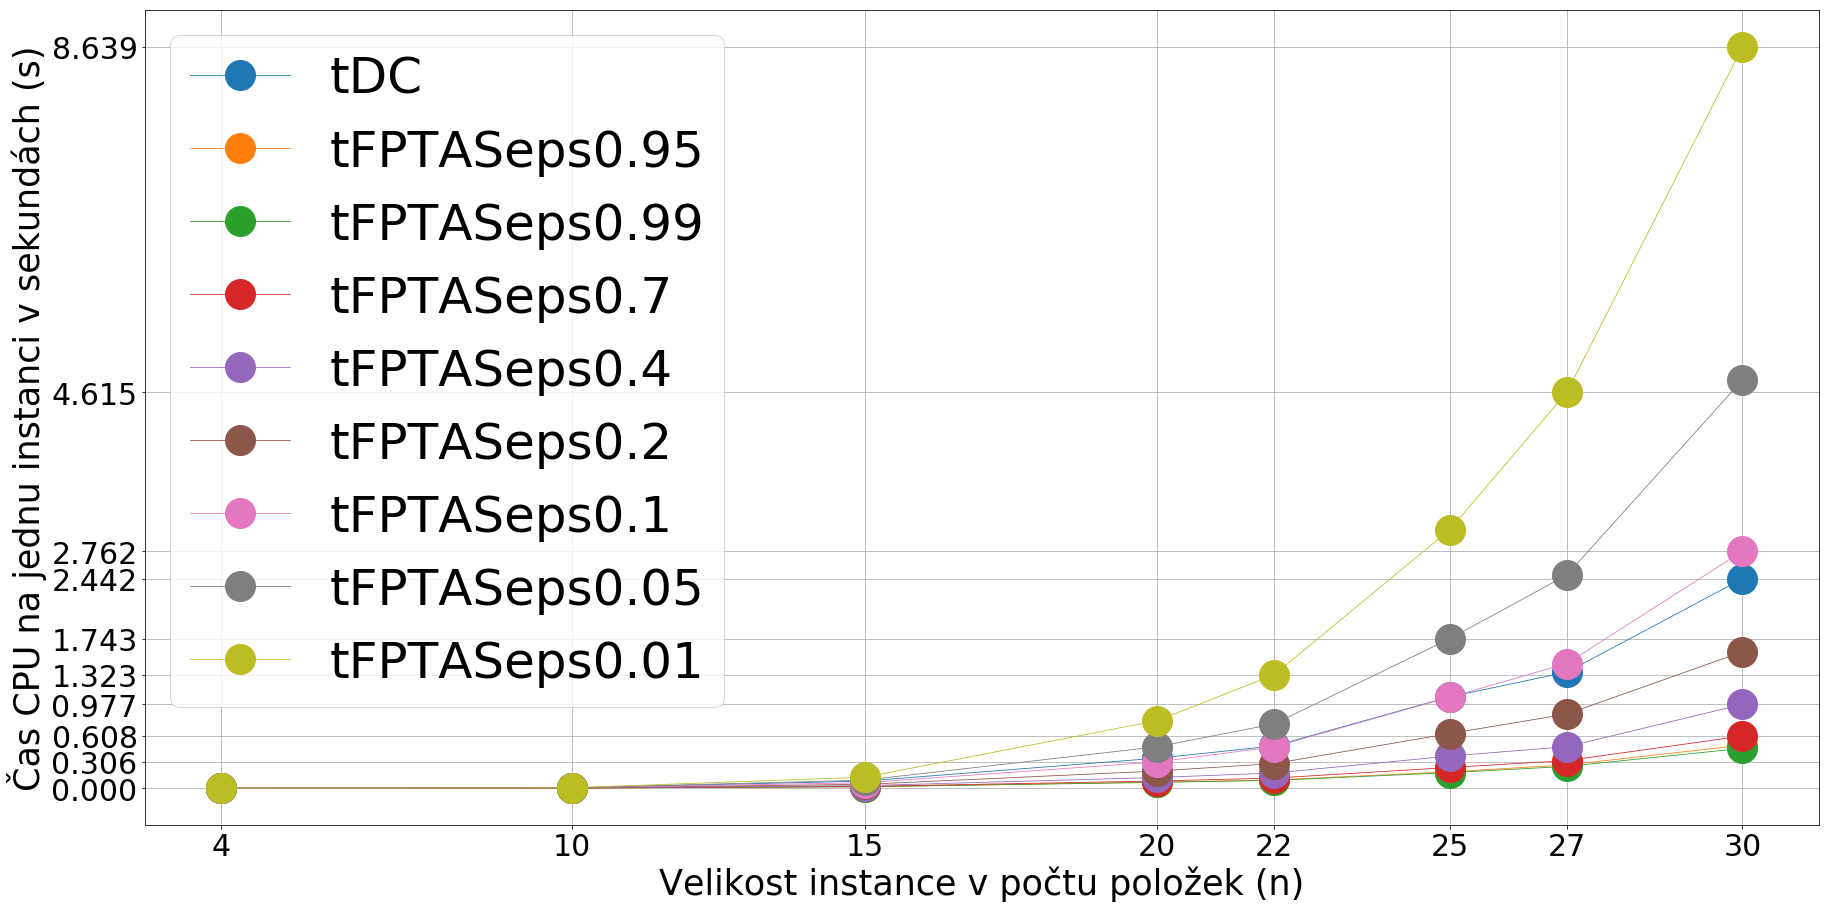

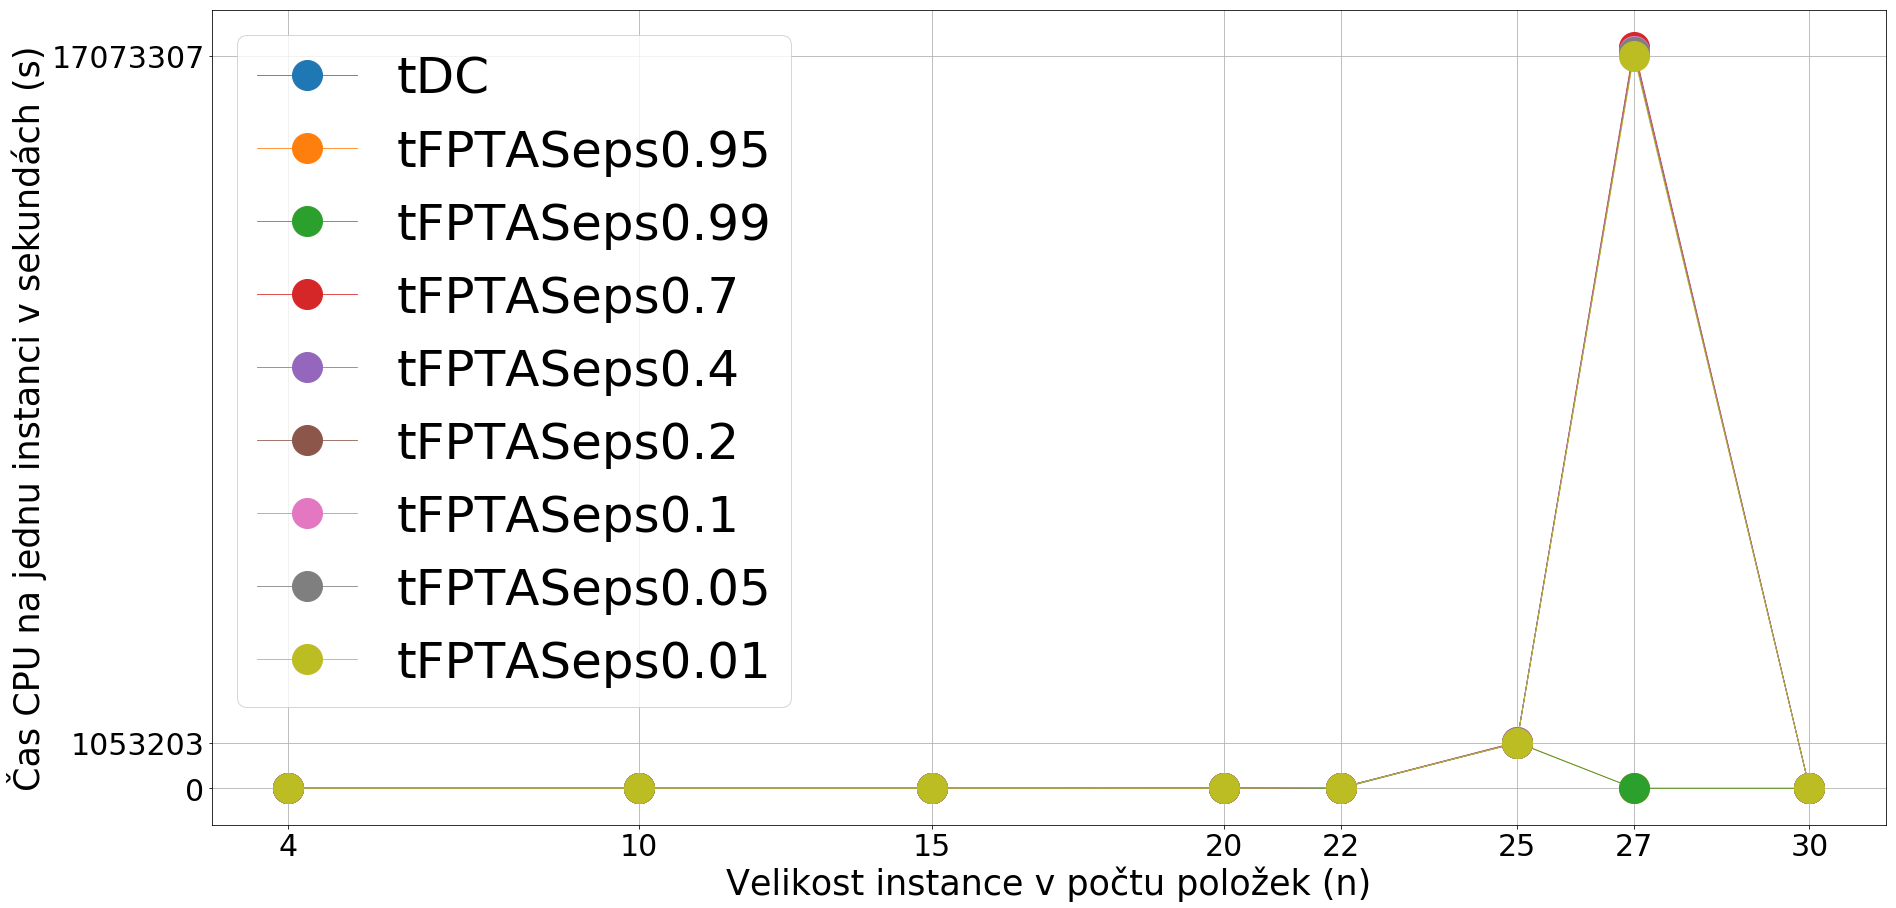

In [7]:
do_plot(30, 15, timeMean.index, timeMean[['tDC','tFPTASeps0.95','tFPTASeps0.99',
                                          'tFPTASeps0.7',
                                          'tFPTASeps0.4',
                                          'tFPTASeps0.2','tFPTASeps0.1','tFPTASeps0.05','tFPTASeps0.01']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        [], "test.pdf", 30, 1000)
do_plot(30, 15, timeMean.index, timeMedian[['tDC','tFPTASeps0.95','tFPTASeps0.99',
                                          'tFPTASeps0.7',
                                          'tFPTASeps0.4',
                                          'tFPTASeps0.2','tFPTASeps0.1','tFPTASeps0.05','tFPTASeps0.01']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        [], "test.pdf", 30, 1000)

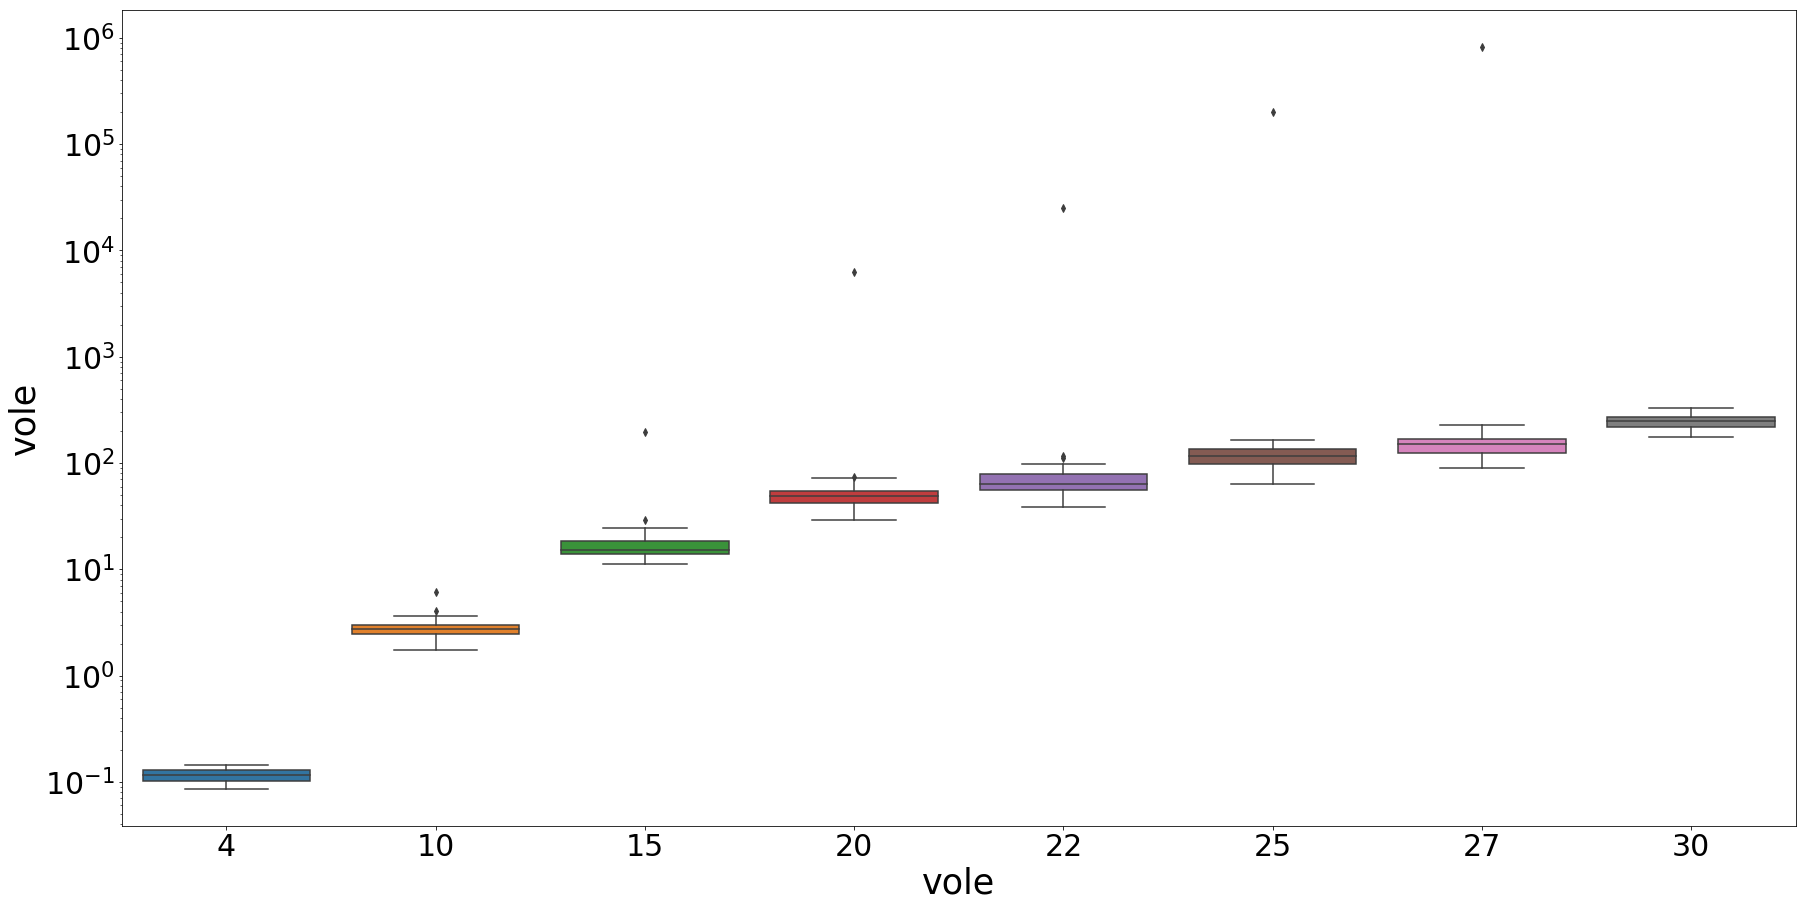

In [23]:
do_box_plot('n', 'tB', RAW_DATA, 'vole', 'vole', 'vole.pdf')